In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error

### Eksploracja danych

- wczytać dane data/StudentsPerformance.csv
- przeprowadzić krótką eksplorację
- zamienić dane jakościowe na one_hot_encodding
- wyznaczyć zbiory cech i wyjścia
- tylko jeden wynik z egzaminu bierzemy jako y
- resztę dorzucamy do cech
- podzielić na zbiory treningowe oraz testowe

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
for column in df.columns:
    print('Nazwa kolumny: ',column,
          '\nSuma wartości null:',sum(df[column].isnull()),
          '\nCharakterystyka kolumny:\n',df[column].describe(),
          '\nUnikalne wartości:\n', df[column].unique(),'\n' )

Nazwa kolumny:  gender 
Suma wartości null: 0 
Charakterystyka kolumny:
 count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object 
Unikalne wartości:
 ['female' 'male'] 

Nazwa kolumny:  race/ethnicity 
Suma wartości null: 0 
Charakterystyka kolumny:
 count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object 
Unikalne wartości:
 ['group B' 'group C' 'group A' 'group D' 'group E'] 

Nazwa kolumny:  parental level of education 
Suma wartości null: 0 
Charakterystyka kolumny:
 count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object 
Unikalne wartości:
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Nazwa kolumny:  lunch 
Suma wartości null: 0 
Charakterystyka kolumny:
 count         1000
unique           2
top       standard
freq           645
Name: lunc

### Eksploracja i obróbka danych

##### Podział na x i y

In [5]:
x1 = df.iloc[:,:5]
y1 = df.iloc[:,5:]

In [8]:
x1_dummie = pd.get_dummies(x1)
x1_dummie

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [9]:
x1_dummie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
gender_female                                     1000 non-null uint8
gender_male                                       1000 non-null uint8
race/ethnicity_group A                            1000 non-null uint8
race/ethnicity_group B                            1000 non-null uint8
race/ethnicity_group C                            1000 non-null uint8
race/ethnicity_group D                            1000 non-null uint8
race/ethnicity_group E                            1000 non-null uint8
parental level of education_associate's degree    1000 non-null uint8
parental level of education_bachelor's degree     1000 non-null uint8
parental level of education_high school           1000 non-null uint8
parental level of education_master's degree       1000 non-null uint8
parental level of education_some college          1000 non-null uint8
parental level of education_some high school      1000

In [11]:
x_arr = x1_dummie.to_numpy()
y_arr = y1.to_numpy()

In [17]:
X = np.concatenate((x_arr, y_arr[:,:2]), axis=1)
X

array([[ 1,  0,  0, ...,  1, 72, 72],
       [ 1,  0,  0, ...,  0, 69, 90],
       [ 1,  0,  0, ...,  1, 90, 95],
       ...,
       [ 1,  0,  0, ...,  0, 59, 71],
       [ 1,  0,  0, ...,  0, 68, 78],
       [ 1,  0,  0, ...,  1, 77, 86]])

In [21]:
# choosing writing score as an output
Y = y_arr[:,-1]
Y

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  78,  86,  28,  46,  61,  63,  70,  53,  73,  80,  72,
        55,  75,  65,  75,  74,  61,  65,  38,  82,  79,  83,  59,  88,
        57,  54,  68,  65,  66,  54,  57,  62,  76,  76,  82,  48,  68,
        42,  75,  87,  43,  86,  49,  58,  10,  72,  34,  55,  71,  59,
        61,  37,  74,  56,  57,  73,  63,  48,  56,  41,  38,  22,  81,
        72,  68,  50,  45,  54,  63,  34,  82,  88,  74,  67,  82,  74,
        36,  71,  50,  92,  82,  62,  70,  62,  62,  67,  74,  89,  47,
        90,  72, 100,  64,  70,  72,  98,  49,  47,  54, 100,  74,  82,
        79,  61,  65,  89,  92,  93,  56,  73,  86,  67,  74,  74,  51,
        82,  40,  70,  84,  75,  48,  41,  56,  67,  69,  71,  64,  54,
        47,  78,  33,  75,  66,  81,  93,  69,  68,  66,  47,  61,  88,
        78,  60,  87,  64,  74,  85,  52,  49,  91, 100,  51,  78,  78,
        70,  74,  78,  81,  70,  54,  87,  58,  77,  62, 100,  7

In [39]:
# split into test and training set
data = (x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size= 0.2, random_state=13)

### Modelowanie

- tworzymy modele
  - GradientBoostingRegressor
  - RandomForestRegressor
  - XGBRegressor
- trenujemy za pomocą cross walidacji
- wyznaczamy nastepujące wyniki:
- średni czas treningu
- średni czas obliczania score'a
- średni score
- wyniki porównania przedstawiamy na wykresie wnioski

In [40]:
models = {'RandomForest': RandomForestRegressor(),
          'GradientBoosting': GradientBoostingRegressor(),
          'XGB': XGBRegressor(objective = 'reg:squarederror')
         }

In [67]:
def CV_train(model, data, output, cv=5):
   
    # przeprowadzamy kross walidację i zbieramy wyniki
    results = cross_validate(model, data, output, cv=cv)
    # zwracamy średnie ze wszystkich przebiegów
    outputDict = {
        'meanFitTime': results['fit_time'].mean(),
        'meanScoreTime': results['score_time'].mean(),
        'meanScore':  results['test_score'].mean()
    }
    return outputDict

In [96]:
def model_train(modelList, dataset):
 
    x_train, x_test, y_train, y_test = dataset
    
    results = {
        "modelName": [],
        "meanScore": [],
        "meanFitTime": [],
        "meanScoreTime": []
    }
  
    for model in models:
        scores = CV_train(models[model], x_train, y_train)
        print("{0} mean train score = {1}".format(model,(scores['meanScore'])))
        results["modelName"].append(model)
        results["meanScore"].append(scores['meanScore'])
        results["meanFitTime"].append(scores['meanFitTime'])
        results["meanScoreTime"].append(scores['meanScoreTime'])
        
        # fit on whole train data
        models[model].fit(x_train, y_train)
    
    # present results on charts
   # printResultsCharts(results)
    results = pd.DataFrame(results)
    
    ax1 = results.plot.barh(x="modelName", y="meanFitTime", subplots=True,  figsize=(10,7))
    ax2 = results.plot.barh(x="modelName", y="meanScore", subplots=True, figsize=(10,7))
    ax3 = results.plot.barh(x="modelName", y="meanScoreTime",subplots=True, figsize=(10,7))
    
    return results 

RandomForest mean train score = 0.9228411061346407
GradientBoosting mean train score = 0.9379344398677363
XGB mean train score = 0.9388539371333426


,modelName,meanScore,meanFitTime,meanScoreTime
0,RandomForest,0.922841,0.213731,0.008951
1,GradientBoosting,0.937934,0.064240,0.000848
2,XGB,0.938854,0.035115,0.001032


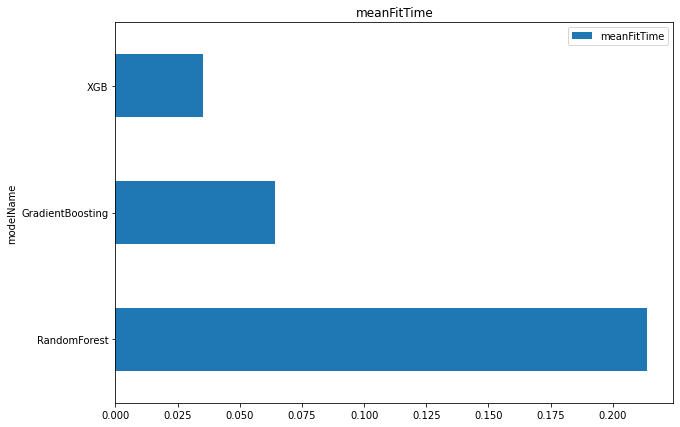

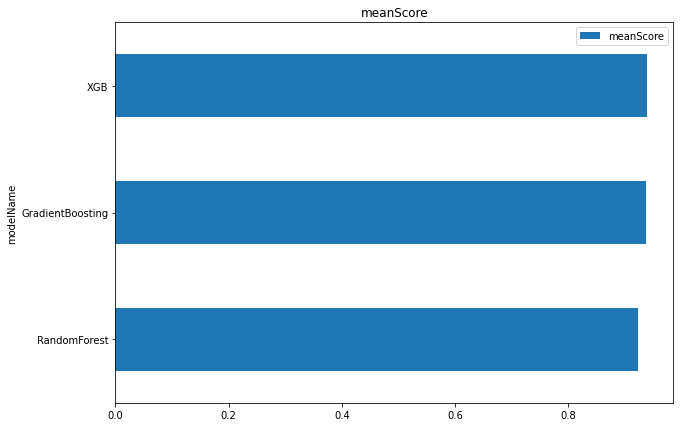

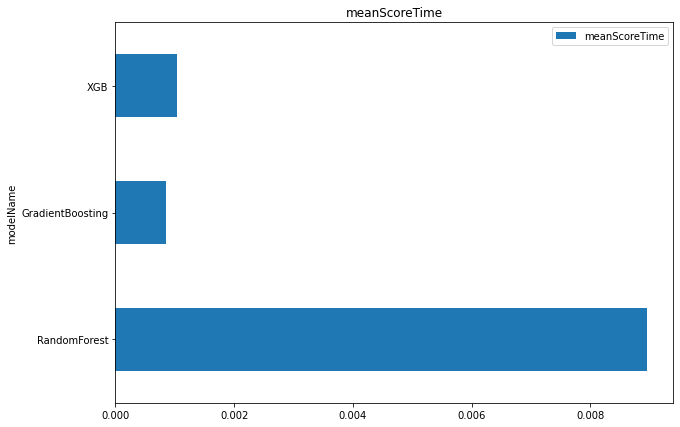

In [97]:
model_train(models, data)

##### XGB będzie najoptymalniejszym modelem

### Dopasopwanie na zbiorze testowym

In [105]:
def model_test(modelList, dataset):
 
    x_train, x_test, y_train, y_test = dataset
    
    results = {
        "modelName": [],
        "testScore": [],
    }
  
    for model in modelList:
        scores = modelList[model].score(x_test, y_test)
        print("{0} test score = {1}".format(model,scores))
        results["modelName"].append(model)
        results["testScore"].append(scores)
        
  
    results = pd.DataFrame(results)
    
    ax1 = results.plot.barh(x="modelName", y="testScore", subplots=True, figsize=(10,7))
    
    return results 

RandomForest test score = 0.9219022587730128
GradientBoosting test score = 0.9280292863430559
XGB test score = 0.9297030215207363


,modelName,testScore
0,RandomForest,0.921902
1,GradientBoosting,0.928029
2,XGB,0.929703


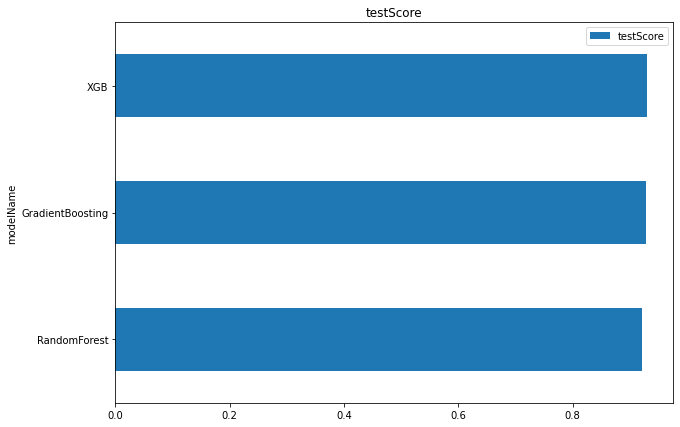

In [106]:
model_test(models, data)